<a href="https://colab.research.google.com/github/sinchana08nayak/hand-written-digit-prediction/blob/main/digit%20prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hand Written Digit Prediction- Classification Analysis**

The digits dataset consists of 8*8 pixel  images of digits.The images attribute of the dataset stores 8*8 arrays of grayscale values for each image .we will use there arrays to visualize the first 4 images.The target attribute of the dataset stores the digit each image represents



In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_digits


In [ ]:
df=load_digits()

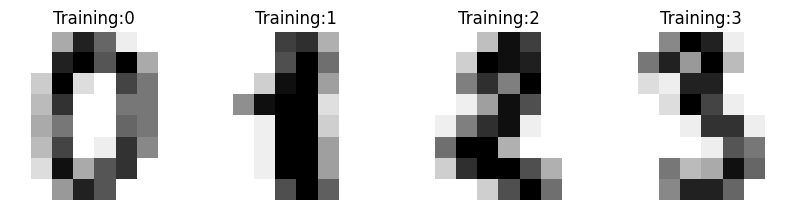

In [ ]:
_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training:%i"% label)



# **Data preprocessing**

Flattern Image

In [ ]:
df.images.shape


(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:

len(df.images)

1797

In [ ]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:

data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

**Scaling Image Data**

In [ ]:


data.min()

0.0

In [ ]:

data.max()

16.0

In [ ]:

data=data/16

In [ ]:

data.min()

0.0

In [ ]:

data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**Train Test_split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf=RandomForestClassifier()


rf.fit(X_train,y_train)


RandomForestClassifier()

**Predict Test Data**

In [ ]:

y_pred=rf.predict(X_test)


y_pred


array([4, 0, 5, 3, 7, 4, 9, 1, 4, 9, 0, 4, 6, 3, 0, 3, 9, 2, 0, 6, 9, 3,
       1, 8, 9, 2, 2, 3, 2, 3, 3, 6, 3, 4, 5, 1, 7, 5, 9, 9, 6, 1, 7, 0,
       4, 5, 3, 6, 5, 4, 0, 4, 4, 2, 2, 8, 1, 0, 5, 0, 9, 3, 0, 0, 3, 7,
       8, 3, 0, 1, 4, 2, 3, 0, 2, 6, 6, 2, 7, 9, 4, 1, 1, 6, 9, 7, 6, 8,
       5, 9, 5, 9, 2, 4, 7, 5, 0, 4, 0, 2, 8, 5, 3, 7, 5, 7, 7, 4, 2, 9,
       8, 7, 2, 9, 3, 2, 6, 8, 5, 9, 2, 0, 7, 4, 0, 0, 4, 1, 5, 6, 7, 5,
       7, 5, 6, 3, 2, 7, 9, 2, 9, 5, 4, 1, 9, 0, 9, 6, 7, 7, 4, 3, 9, 9,
       4, 5, 0, 8, 0, 4, 4, 6, 0, 4, 5, 8, 4, 0, 7, 8, 4, 7, 3, 2, 3, 4,
       5, 9, 8, 6, 0, 7, 1, 1, 9, 9, 4, 2, 0, 0, 5, 1, 0, 4, 1, 0, 0, 7,
       2, 4, 7, 7, 8, 2, 0, 5, 3, 3, 9, 7, 2, 9, 5, 9, 5, 3, 6, 9, 6, 2,
       5, 6, 3, 4, 1, 9, 4, 1, 8, 3, 4, 6, 8, 5, 5, 6, 7, 6, 9, 5, 1, 4,
       0, 0, 4, 8, 5, 1, 0, 7, 4, 1, 9, 4, 5, 7, 2, 3, 0, 8, 5, 4, 8, 4,
       5, 1, 0, 6, 3, 8, 2, 0, 3, 8, 9, 5, 3, 3, 9, 7, 4, 9, 5, 5, 7, 8,
       9, 3, 8, 3, 2, 6, 9, 3, 5, 8, 7, 6, 5, 2, 4,

**MOdel Accuracy**

In [ ]:

from sklearn.metrics import confusion_matrix,classification_report


confusion_matrix(y_test, y_pred)


array([[66,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 53,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 67,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  0, 40,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  1, 62]])

In [ ]:


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       0.94      1.00      0.97        47
           2       1.00      1.00      1.00        47
           3       0.98      0.95      0.96        56
           4       1.00      1.00      1.00        55
           5       0.99      0.97      0.98        69
           6       0.98      1.00      0.99        47
           7       1.00      1.00      1.00        46
           8       0.95      0.95      0.95        42
           9       0.97      0.95      0.96        65

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

